In [37]:
import ROOT
import numpy as np
from array import *
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import colors 
import math
import pandas as pd

In [38]:
def resultsTOtxt(arr,  filename):
#arr is the concatenated and transposed array of all the arrays wished to be written
#arrDescription a string describing and is each collumn of the file
#writes out each array concatenated in arr as an collumn in the file
    file = open(filename, 'w')
    np.savetxt(filename, arr, delimiter=' ')
    file.close()
    
def GetNpArraysFromTrees(tree, branch_name):
    estimate = 3e6 #amount of numbers getting from branch
    tree.SetEstimate(int(estimate))
    result_hist = tree.Draw(branch_name, "", "goff")
    result = np.asarray(np.frombuffer(tree.GetV1(), dtype=np.float64, count=result_hist))
    result = result.copy()
    return result

def GetNpArraysFromTrees2(tree, branch_name):
    estimate = 3e8 #amount of numbers getting from branch
    tree.SetEstimate(int(estimate))
    result_hist = tree.Draw(branch_name, "", "goff")
    result = np.asarray(np.frombuffer(tree.GetV1(), count=result_hist))
    result = result.copy()
    return result

In [39]:
def ReadNuclearModelSamples(IsBDM, massANDboost=None):
    if IsBDM:
        fBDM_00a = ROOT.TFile.Open("/home/leoperes/ntuples_grid_newVertex/00a_newVertex/bdm_"+massANDboost+"_00a.root")
        if massANDboost != 'm20_b10':
            fBDM_01a = ROOT.TFile.Open('/home/leoperes/ntuples_grid_newVertex/01a_newVertex/bdm_'+massANDboost+'_01a.root')
        fBDM_02a = ROOT.TFile.Open('/home/leoperes/ntuples_grid_newVertex/02a_newVertex/bdm_'+massANDboost+'_02a.root')
        fBDM_00b = ROOT.TFile.Open('/home/leoperes/ntuples_grid_newVertex/00b_newVertex/bdm_'+massANDboost+'_00b.root')
        fBDM_01b = ROOT.TFile.Open('/home/leoperes/ntuples_grid_newVertex/01b_newVertex/bdm_'+massANDboost+'_01b.root')
        fBDM_02b = ROOT.TFile.Open('/home/leoperes/ntuples_grid_newVertex/02b_newVertex/bdm_'+massANDboost+'_02b.root')
        if massANDboost != 'm20_b10':
            samples = [fBDM_00a, fBDM_01a, fBDM_02a, fBDM_00b, fBDM_01b, fBDM_02b]
        else:
            samples = [fBDM_00a, fBDM_02a, fBDM_00b, fBDM_01b, fBDM_02b]
        return samples
    if not IsBDM:
        fAtm_00a = ROOT.TFile.Open('/home/leoperes/ntuples_grid_newVertex/00a_newVertex/atm_hA_BR_4ana.root')
        fAtm_01a = ROOT.TFile.Open('/home/leoperes/ntuples_grid_newVertex/01a_newVertex/atm_hA_LFG.root')
        fAtm_02a = ROOT.TFile.Open('/home/leoperes/ntuples_grid_newVertex/02a_newVertex/atm_hA_ESF.root')
        fAtm_00b = ROOT.TFile.Open('/home/leoperes/ntuples_grid_newVertex/00b_newVertex/atm_hN_BR.root')
        fAtm_01b = ROOT.TFile.Open('/home/leoperes/ntuples_grid_newVertex/01b_newVertex/atm_hN_LFG.root')
        fAtm_02b = ROOT.TFile.Open('/home/leoperes/ntuples_grid_newVertex/02b_newVertex/atm_hN_ESF.root')
        samples = [fAtm_00a, fAtm_01a, fAtm_02a, fAtm_00b, fAtm_01b, fAtm_02b]
        return samples

In [40]:
listsamples = ['m05_b1p1', 'm05_b1p5', 'm05_b10', 'm10_b1p1', 'm10_b1p5', 'm10_b10', 'm20_b1p1', 'm20_b1p5', 'm20_b10', 'm40_b1p1', 'm40_b1p5', 'm40_b10']
list_samples_latex = [r'$m_\chi = 5 \text{ GeV}, \; \gamma=1.1$', r'$m_\chi = 5 \text{ GeV}, \; \gamma=1.5$', r'$m_\chi = 5 \text{ GeV}, \; \gamma=10$', r'$m_\chi = 10 \text{ GeV}, \; \gamma=1.1$', r'$m_\chi = 10 \text{ GeV}, \; \gamma=1.5$', r'$m_\chi = 10 \text{ GeV}, \; \gamma=10$', r'$m_\chi = 20 \text{ GeV}, \; \gamma=1.1$', r'$m_\chi = 20 \text{ GeV}, \; \gamma=1.5$', r'$m_\chi = 20 \text{ GeV}, \; \gamma=10$', r'$m_\chi = 40 \text{ GeV}, \; \gamma=1.1$', r'$m_\chi = 40 \text{ GeV}, \; \gamma=1.5$', r'$m_\chi = 40 \text{ GeV}, \; \gamma=10$' ]
list_nuclearmodels = ['hA_BR','hA_LSF', 'hA_ESF', 'hN_BR', 'hN_LFG', 'hN_ESF']

In [67]:
m05 = ReadNuclearModelSamples(True,'m05_b1p1')
m10 = ReadNuclearModelSamples(True,'m10_b1p1')
m20 = ReadNuclearModelSamples(True,'m20_b1p1')
m40 = ReadNuclearModelSamples(True,'m40_b1p1')

b1p1_samples = [m05, m10, m20, m40]

<>:40: SyntaxWarning: invalid escape sequence '\l'
<>:40: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_53420/95905085.py:40: SyntaxWarning: invalid escape sequence '\l'
  stats = (f'Ratio of tracks\n with $\leq 10$ cm:\n'


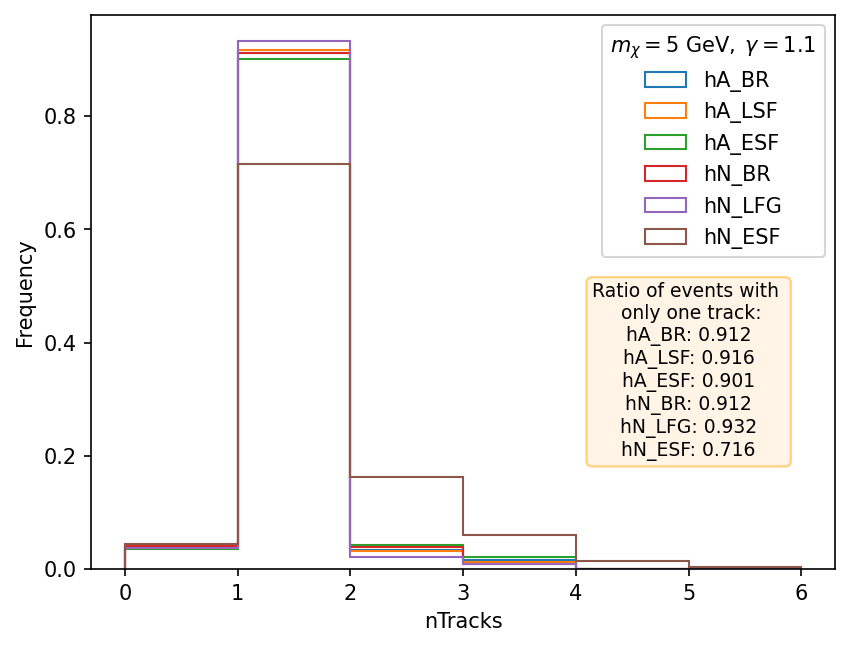

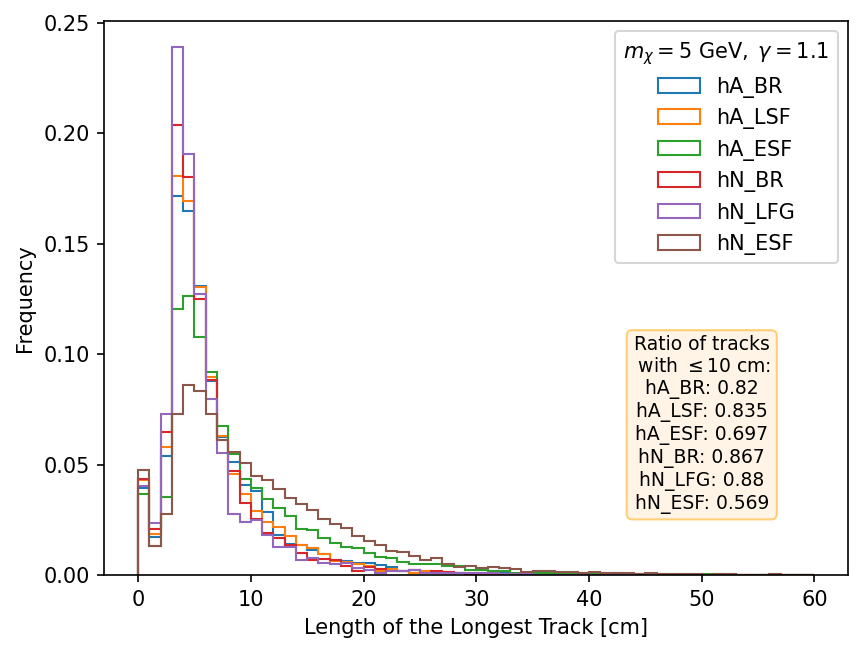

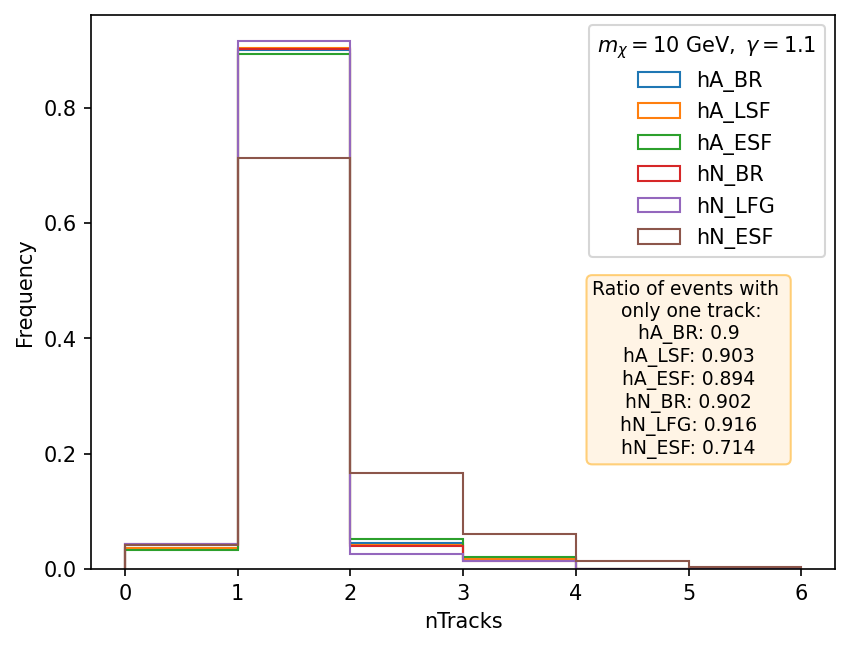

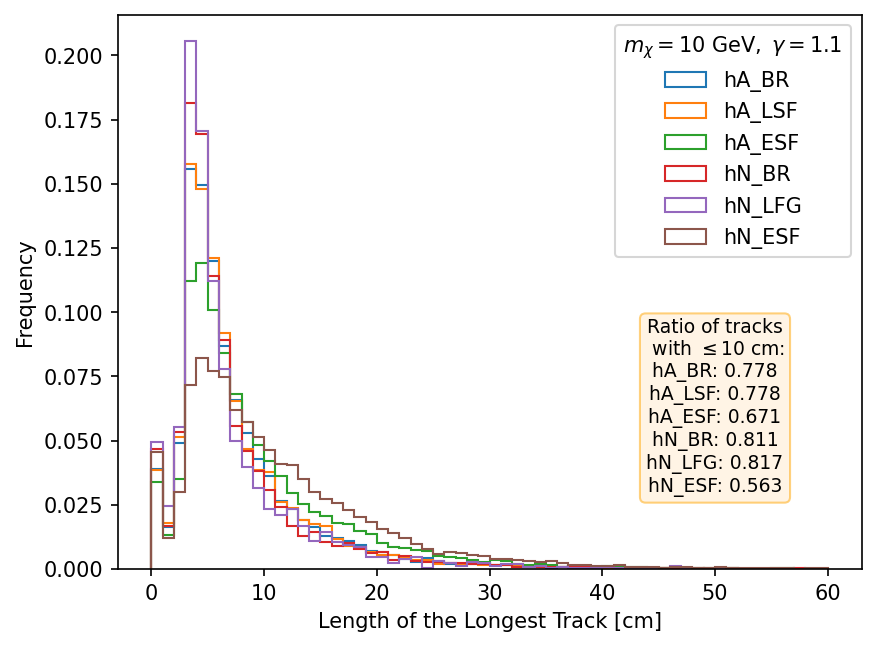

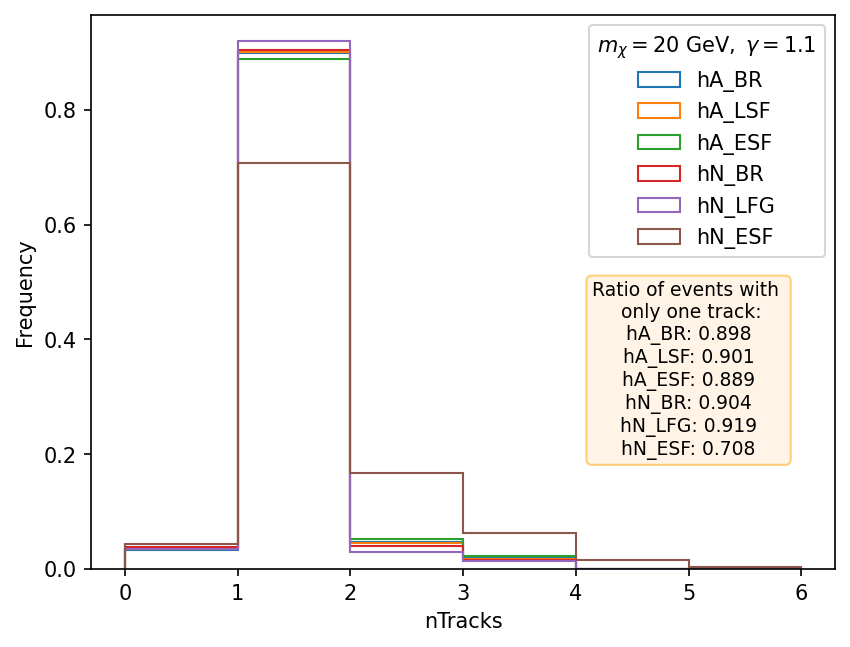

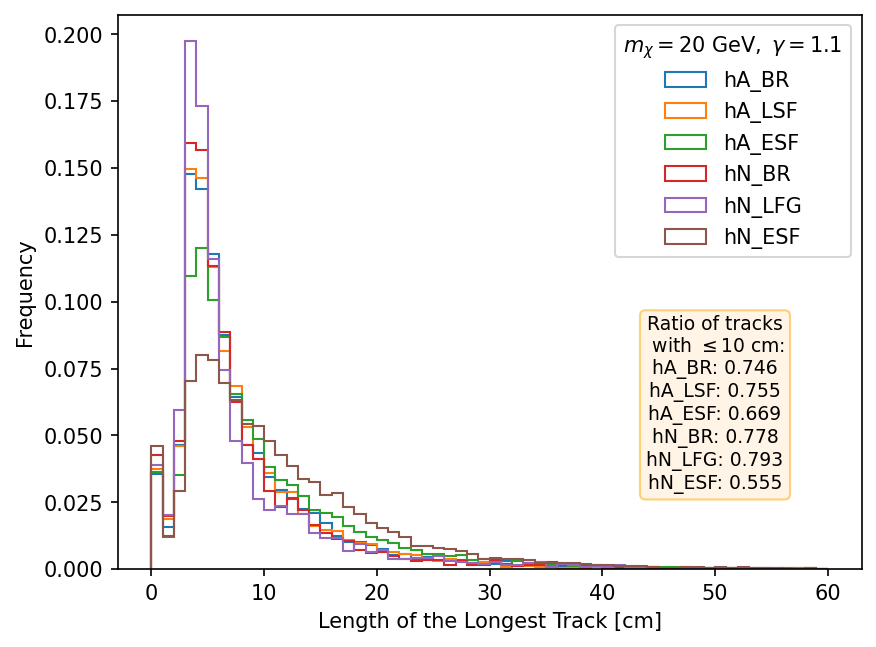

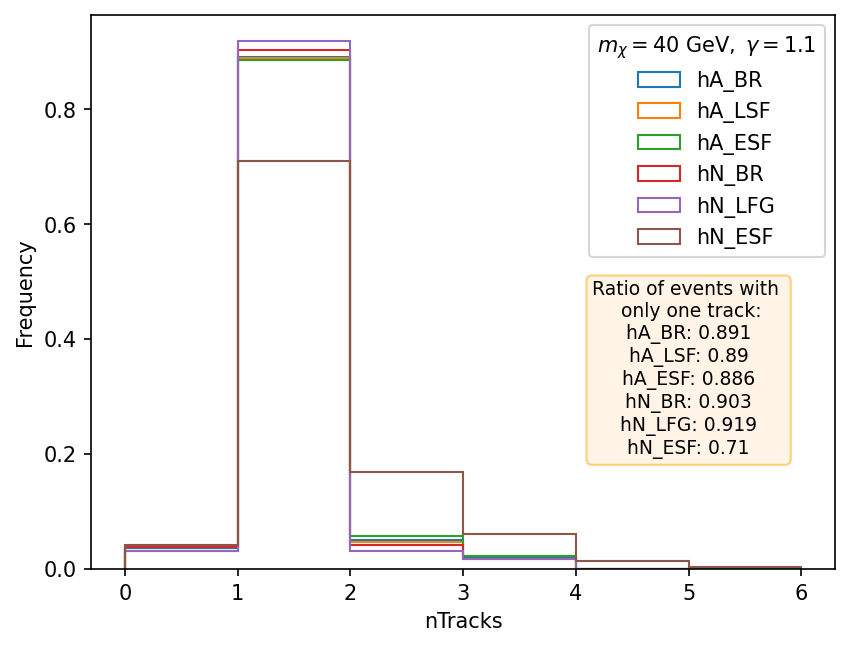

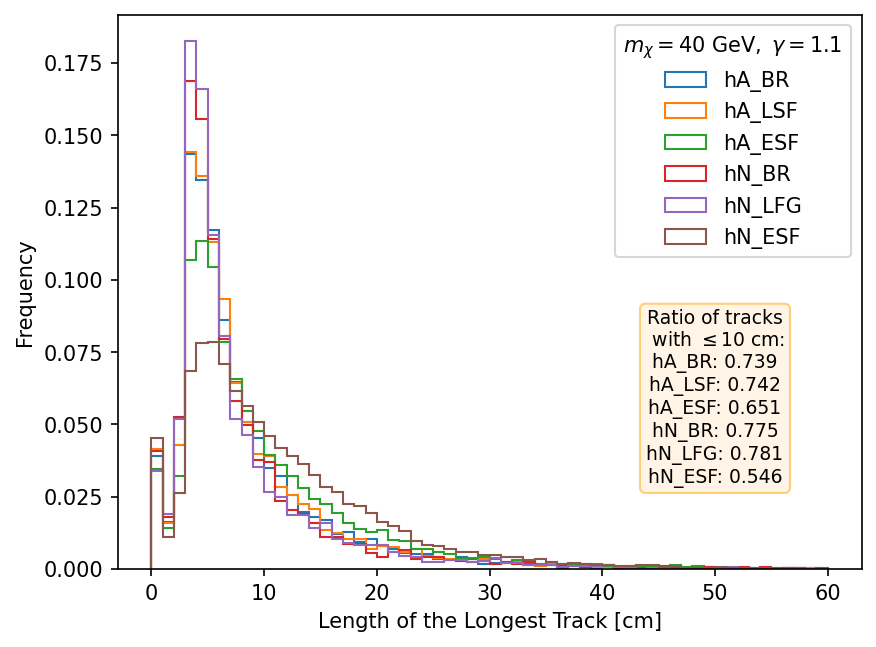

In [94]:
for idx, sample in enumerate(b1p1_samples):
    infiles_list = sample
    intrees_reco = [lambda arg=infile: arg.Get("ana/Atm") for infile in infiles_list]
    intrees_simu = [lambda arg=infile: arg.Get("ana/AllEvents") for infile in infiles_list]
    reco_entries = [intree().GetEntries() for intree in intrees_reco]
    nTracks = [GetNpArraysFromTrees(func(),"nTracks") for func in intrees_reco]
    LongestTrack = [GetNpArraysFromTrees(func(),"LongestTrack") for func in intrees_reco]
    nbins = np.linspace(0,6,7)
    plt.figure(dpi=150)
    h = [plt.hist(x,bins=nbins, label= list_nuclearmodels[id], histtype='step', density=1) for id,x in enumerate(nTracks)]
    plt.xlabel('nTracks')
    plt.ylabel('Frequency')
    
    np_trks = [np.array(ntrk) for ntrk in nTracks]
    ratio_trks = [round(ntrks[ntrks==1].size/ntrks.size,3) for ntrks in np_trks]
    
    # add text box for the statistics
    stats = (f'Ratio of events with \n only one track:\n'
             f'{list_nuclearmodels[0]}: {ratio_trks[0]}\n'
             f'{list_nuclearmodels[1]}: {ratio_trks[1]}\n'
             f'{list_nuclearmodels[2]}: {ratio_trks[2]}\n'
             f'{list_nuclearmodels[3]}: {ratio_trks[3]}\n'
             f'{list_nuclearmodels[4]}: {ratio_trks[4]}\n'
             f'{list_nuclearmodels[5]}: {ratio_trks[5]}')
    
    bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
    plt.text(5, 0.2, stats, fontsize=9, bbox=bbox, horizontalalignment='center')
    
    
    plt.legend(title = list_samples_latex[idx*3])
    plt.show() 
    nbins = np.linspace(0,60,61)
    plt.figure(dpi=150)
    h = [plt.hist(x,bins=nbins, label= list_nuclearmodels[id], histtype='step', density=1) for id,x in enumerate(LongestTrack)]
    
    np_trkssmall = [np.array(lentrk) for lentrk in LongestTrack]
    ratio_trkssmall = [round(lentrks[lentrks<10].size/lentrks.size,3) for lentrks in np_trkssmall]
    
    # add text box for the statistics
    stats = (f'Ratio of tracks\n with $\leq 10$ cm:\n'
             f'{list_nuclearmodels[0]}: {ratio_trkssmall[0]}\n'
             f'{list_nuclearmodels[1]}: {ratio_trkssmall[1]}\n'
             f'{list_nuclearmodels[2]}: {ratio_trkssmall[2]}\n'
             f'{list_nuclearmodels[3]}: {ratio_trkssmall[3]}\n'
             f'{list_nuclearmodels[4]}: {ratio_trkssmall[4]}\n'
             f'{list_nuclearmodels[5]}: {ratio_trkssmall[5]}')
    
    bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
    plt.text(50, 0.03, stats, fontsize=9, bbox=bbox, horizontalalignment='center')
    
    
    plt.xlabel('Length of the Longest Track [cm]')
    plt.ylabel('Frequency')
    plt.legend(title = list_samples_latex[idx * 3])
    plt.show() 